## Imports

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Data

In [8]:
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning

In [9]:
# TRaduzindo os títulos e puxando as info
df.columns = ['PedidoNum', 'ProdutoCod', 'ProdutoDesc', 'Qtd', 'PedidoData', 'PrecoUnit', 'ClienteID', 'Pais']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   PedidoNum    541909 non-null  object        
 1   ProdutoCod   541909 non-null  object        
 2   ProdutoDesc  540455 non-null  object        
 3   Qtd          541909 non-null  int64         
 4   PedidoData   541909 non-null  datetime64[ns]
 5   PrecoUnit    541909 non-null  float64       
 6   ClienteID    406829 non-null  float64       
 7   Pais         541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Na descrição do conjunto de dados é informado que os pedidos que se iniciam com C representam cancelamentos.
# Portanto, ester registros serão eliminados do conjunto.

df = df[df['PedidoNum'].str[0] != 'C']

In [11]:
df.isnull().sum()

PedidoNum           0
ProdutoCod          0
ProdutoDesc      1454
Qtd                 0
PedidoData          0
PrecoUnit           0
ClienteID      134697
Pais                0
dtype: int64

In [12]:
df = df[df['ClienteID'].notnull()]

In [13]:
df.duplicated().sum()

5192

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df.describe()

,Qtd,PrecoUnit,ClienteID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df[df['PrecoUnit']==0].head()

,PedidoNum,ProdutoCod,ProdutoDesc,Qtd,PedidoData,PrecoUnit,ClienteID,Pais
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [17]:
# Venda mais antiga
df['PedidoData'].min()

Timestamp('2010-12-01 08:26:00')

In [18]:
# Venda mais recente
df['PedidoData'].max()

Timestamp('2011-12-09 12:50:00')

## Features

In [19]:
# Criando coluna preço total

df['PrecoTotal'] = df['PrecoUnit']*df['Qtd']
df.head()

,PedidoNum,ProdutoCod,ProdutoDesc,Qtd,PedidoData,PrecoUnit,ClienteID,Pais,PrecoTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
dia_do_hit = df['PedidoData'].max() + dt.timedelta(days=1)
dia_do_hit

Timestamp('2011-12-10 12:50:00')

## Calculando os índices R, F e M

In [21]:
# Primeiro deve ser calculado os valores dos índices R, F e M. Observe que no momento ainda não são os níveis, os níveis serão divididos a partir dos quartis destes índices.
# O R será a diferença entre o dia do hit e o dia da última compra por aquele cliente;
# O F será a contagem de pedidos daquele cleinte;
# O M será a soma dos preços totais dos pedidos do cliente.

In [24]:
# Agrupando por lciente e aplicando os cálculos Pas colunas data (diferença de dias para Recência), número do pedido (contagem apra frequêmcia) e o Preço total (soma para Vaalor Monetário)

rfm = df.groupby(['ClienteID']).agg({'PedidoData': lambda x: (dia_do_hit - x.max()).days, 'PedidoNum':'count','PrecoTotal':'sum'})

# Renomeando as colunas, pois elas são criadas com os nomes originais e não das métricas

rfm = rfm.rename(columns={'PedidoData':'Recência','PedidoNum':'Frequência','PrecoTotal':'ValorMonetário'})

rfm.head()

,Recência,Frequência,ValorMonetário
ClienteID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [36]:
# O R deverá ser atribuído de forma descrescente (os clientes com menor R receberão níveis mais altos);
# Já o F e o M deverão ser atribuídos de forma crescente (os clientes com maior F e M receberão níveis mais altos);

# Criando os níveis de R, F e M - 5 níveis
niveis_r = range(5, 0, -1)
niveis_f = range(1, 6)
niveis_m = range(1, 6)

# Dividindo a lista de cliente em 5 quintis (dividindo nos quaartis)
r_quintis = pd.qcut(rfm['Recência'], q= 5, labels = niveis_r)
f_quintis = pd.qcut(rfm['Frequência'], q= 5, labels = niveis_f)
m_quintis = pd.qcut(rfm['ValorMonetário'], q= 5, labels = niveis_m)
rfm = rfm.assign ( R=r_quintis, F=f_quintis, M=m_quintis)

# Criando tabela atribuindo níveis RFM e pontuação RFM (coma dos níveis)
def add_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_cluster'] = rfm.apply(add_rfm, axis=1)
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm['FM_media'] = rfm[['F', 'M']].mean(axis=1).round()
rfm = rfm.reset_index()
rfm.head()

,index,ClienteID,Recência,Frequência,ValorMonetário,R,F,M,RFM_cluster,RFM_score,RFM_media,FM_media
0,0,12346.0,326,1,77183.60,1,1,5,115,7,3.0,3.0
1,1,12347.0,2,182,4310.00,5,5,5,555,15,5.0,5.0
2,2,12348.0,75,31,1797.24,2,3,4,234,9,4.0,4.0
3,3,12349.0,19,73,1757.55,4,4,4,444,12,4.0,4.0
4,4,12350.0,310,17,334.40,1,2,2,122,5,2.0,2.0


## Criação da matriz RFM

In [37]:
# Para a criação da matriz sugerida no início do estudo é necessário apenas pivotar ou transpor, e preenche-la com a contagem de clientes.

pivot_rfm = rfm.pivot_table(values='ClienteID', index='FM_media', columns='R', aggfunc = 'count', fill_value=0)
pivot_rfm = pivot_rfm.loc[[5.0, 4.0, 3.0, 2.0, 1.0],[1,2,3,4,5]]
pivot_rfm

R,1,2,3,4,5
FM_media,,,,,
5.0,8,34,83,170,306
4.0,75,218,279,344,332
3.0,80,152,130,115,89
2.0,432,316,276,205,106
1.0,270,123,90,71,35


Text(0.5, 1.0, 'Matriz RFM')

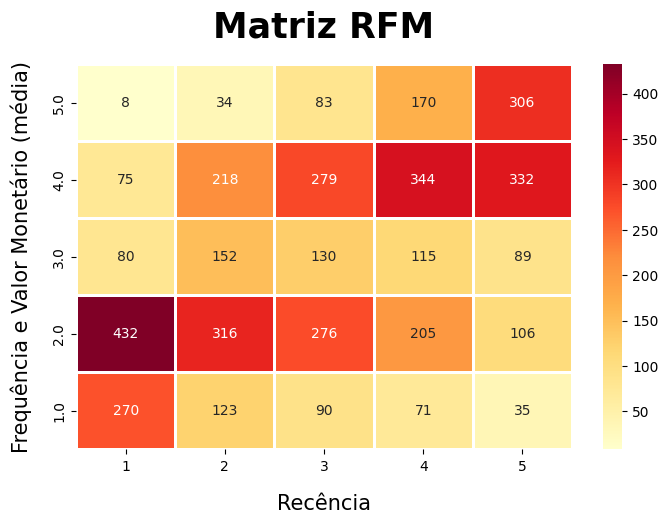

In [38]:
plt.figure(figsize=(8,5))
plot = sns.heatmap(pivot_rfm, cmap='YlOrRd', linewidth=1, linecolor='white', annot=True, fmt='.0f')
plot.set_xlabel('Recência', fontsize=15, labelpad=15)
plot.set_ylabel('Frequência e Valor Monetário (média)', fontsize=15, labelpad=15)
plot.set_title('Matriz RFM', fontsize=25, fontweight='bold', pad=20)

In [35]:
# Exportar para excel

# rfm.to_excel("nomedaplanilha.xlsx", index=False)

## Demais Consultas

In [40]:
# A matriz permite recuperar os clientes com qualquer filtro desejado, como por exemplo:
# Consultar clientes campeões (R nível 5 e média de F e M nível 5)

# Consultar segmento '555'
rfm[rfm['RFM_cluster']=='555']

,index,ClienteID,Recência,Frequência,ValorMonetário,R,F,M,RFM_cluster,RFM_score,RFM_media,FM_media
1,1,12347.0,2,182,4310.00,5,5,5,555,15,5.0,5.0
15,15,12362.0,3,266,5226.23,5,5,5,555,15,5.0,5.0
56,56,12417.0,3,192,3649.10,5,5,5,555,15,5.0,5.0
71,71,12433.0,1,420,13375.87,5,5,5,555,15,5.0,5.0
75,75,12437.0,2,200,4951.41,5,5,5,555,15,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4292,4292,18223.0,5,272,6484.54,5,5,5,555,15,5.0,5.0
4294,4294,18225.0,3,269,5504.96,5,5,5,555,15,5.0,5.0
4298,4298,18229.0,12,164,7276.90,5,5,5,555,15,5.0,5.0
4310,4310,18245.0,7,175,2567.06,5,5,5,555,15,5.0,5.0


In [42]:
# Atribuir classes
# é possível atribuir as classes pré-definidas a cada setor da matriz de acordo com as diretrizes da empresa. Neste casoo iremos atribuir as classes sugeridas no ínicio do estudo.

rfm['R'] = rfm['R'].astype('int64')
rfm['FM_media'] = rfm['FM_media'].astype('int64')

def classificar(df):
    if (df['FM_media'] == 5) and (df['R'] == 1):
        return 'Não posso perdê-lo'
    elif (df['FM_media'] == 5) and ((df['R'] == 3) or (df['R'] == 4)):
        return 'Cliente leal'
    elif (df['FM_media'] == 5) and (df['R'] == 5):
        return 'Campeão'
    elif (df['FM_media'] == 4) and (df['R'] >= 3):
        return 'Cliente leal'    
    elif (df['FM_media'] == 3) and (df['R'] == 3):
        return 'Precisa de atenção'    
    elif ((df['FM_media'] == 3) or (df['FM_media'] == 2))  and (df['R'] > 3):
        return 'Lealdade potencial' 
    elif ((df['FM_media'] == 2) or (df['FM_media'] == 1)) and (df['R'] == 1):
        return 'Perdido'     
    elif (df['FM_media'] == 2) and (df['R'] == 2):
        return 'Hibernando'     
    elif ((df['FM_media'] == 2) or (df['R'] == 1)) and (df['R'] == 3):
        return 'Prestes a hibernar'
    elif (df['FM_media'] == 1) and (df['R'] == 2):
        return 'Perdido'
    elif (df['FM_media'] == 1) and (df['R'] == 4):
        return 'Promissor'       
    elif (df['FM_media'] == 1) and (df['R'] == 5):
        return 'Recentes'  
    else:
        return 'Em risco'

rfm['Classe'] = rfm.apply(classificar,axis=1)
rfm

,index,ClienteID,Recência,Frequência,ValorMonetário,R,F,M,RFM_cluster,RFM_score,RFM_media,FM_media,Classe
0,0,12346.0,326,1,77183.60,1,1,5,115,7,3.0,3,Em risco
1,1,12347.0,2,182,4310.00,5,5,5,555,15,5.0,5,Campeão
2,2,12348.0,75,31,1797.24,2,3,4,234,9,4.0,4,Em risco
3,3,12349.0,19,73,1757.55,4,4,4,444,12,4.0,4,Cliente leal
4,4,12350.0,310,17,334.40,1,2,2,122,5,2.0,2,Perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,4334,18280.0,278,10,180.60,1,1,1,111,3,1.0,1,Perdido
4335,4335,18281.0,181,7,80.82,1,1,1,111,3,1.0,1,Perdido
4336,4336,18282.0,8,12,178.05,5,1,1,511,7,1.0,1,Recentes
4337,4337,18283.0,4,721,2045.53,5,5,4,554,14,4.0,4,Cliente leal
